#### - audio: strt = {'0.0000': 272}, shape = {'1.0000': 272}, step = {'0.0100': 272}
#### - eyes: strt = [('0.01', 98), ('0.00', 208)], 
##### shape = [('4.00', 35), ('3.91', 1), ('2.88', 1), ('2.58', 1), ('2.41', 1), ('2.13', 1), ('2.12', 2), ('2.11', 2), ('2.09', 2), ('2.02', 1), ('2.00', 259)], 
##### step = {'0.020': 271, '0.040': 35}
#### - face: strt = [('0.76', 1), ('0.01', 75), ('0.00', 180)] !!!!!! ОДИН файл сдвинут!!! 
##### shape = [('4.43', 1), ('4.17', 1), ('4.15', 1), ('4.12', 1), ('4.09', 1), ('4.00', 19), ('3.17', 1), ('2.54', 1), ('2.24', 2), ('2.15', 1), ('2.12', 1), ('2.11', 1), ('2.10', 1), ('2.09', 1), ('2.08', 2), ('2.07', 2), ('2.06', 1), ('2.05', 3), ('2.03', 2), ('2.02', 3), ('2.01', 8), ('2.00', 202)], 
##### step = {'0.02': 233, '0.04': 23}

#### - kinect: strt = [('0.06', 40), ('0.05', 47), ('0.04', 44), ('0.03', 42), ('0.02', 34), ('0.01', 28), ('0.00', 60)]
##### shape = [('6.70', 2), ('6.69', 1), ('6.68', 36), ('6.67', 191), ('6.66', 59), ('6.65', 6)]
##### step = {'0.07': 295}

## Что сделать: 1) Время удаляем из меток только после обработки файлов по серединкам... Собственно добавить обработку файлов!!!! 2) посмотреть за изменением метки во времени (по всему файлу) 3) посмотреть по фичам среднее кол-во вырезанного материала

In [195]:
import torch
import pandas as pd
import csv
import sys
import os
import numpy as np
import matplotlib.pyplot as plt


In [2]:
!pwd

/home/r/Desktop/EmoRecognize


In [3]:
pathaudio = 'Data/train/audio/'
patheyes = 'Data/train/eyes/'
pathface = 'Data/train/face_nn/'
pathkinect = 'Data/train/kinect/'
pathlabels = 'Data/train/labels/'

In [4]:
list_audio = os.listdir(pathaudio)
list_eyes = os.listdir(patheyes)
list_face = os.listdir(pathface)
list_kinect = os.listdir(pathkinect)
list_labels = os.listdir(pathlabels)

### 123

In [5]:
print('Количество файлов по папкам:\n1) audio: {}'
      '\n2) eyes: {} \n3) face: {} \n4) kinect: {} \n5) labels: {}'
     .format(len(list_audio), len(list_eyes), len(list_face), len(list_kinect), len(list_labels)))

Количество файлов по папкам:
1) audio: 272
2) eyes: 306 
3) face: 256 
4) kinect: 295 
5) labels: 312


In [6]:
dict_of_labels = {}
count_dict = {}

for label in list_labels:
    count_audio = list_audio.count(label)
    count_eyes = list_eyes.count(label)
    count_face = list_face.count(label)
    count_kinect = list_kinect.count(label)
    
    object_dict = {'audio' : count_audio, 'eyes' : count_eyes, 'face' : count_face, 'kinect' : count_kinect}
    
    dict_of_labels[label] = object_dict
    count_dict[label] = count_audio + count_eyes + count_face + count_kinect

In [7]:
dict_of_labels

{'ida5a773a8.csv': {'audio': 0, 'eyes': 0, 'face': 0, 'kinect': 0},
 'id5181a851.csv': {'audio': 1, 'eyes': 1, 'face': 1, 'kinect': 1},
 'id13feb714.csv': {'audio': 1, 'eyes': 1, 'face': 1, 'kinect': 1},
 'idde0a7733.csv': {'audio': 0, 'eyes': 1, 'face': 0, 'kinect': 1},
 'id42d71a97.csv': {'audio': 0, 'eyes': 1, 'face': 1, 'kinect': 1},
 'id4d4cd53e.csv': {'audio': 1, 'eyes': 1, 'face': 0, 'kinect': 1},
 'id571e2b00.csv': {'audio': 0, 'eyes': 1, 'face': 1, 'kinect': 0},
 'id911ae0ab.csv': {'audio': 1, 'eyes': 1, 'face': 1, 'kinect': 1},
 'id8036ccb4.csv': {'audio': 1, 'eyes': 1, 'face': 1, 'kinect': 1},
 'idb9d6496b.csv': {'audio': 0, 'eyes': 1, 'face': 1, 'kinect': 0},
 'idd4bd6c5d.csv': {'audio': 1, 'eyes': 1, 'face': 1, 'kinect': 1},
 'idccbc4e35.csv': {'audio': 1, 'eyes': 1, 'face': 1, 'kinect': 1},
 'id652f4abd.csv': {'audio': 1, 'eyes': 1, 'face': 1, 'kinect': 1},
 'id60ac82bb.csv': {'audio': 1, 'eyes': 1, 'face': 0, 'kinect': 1},
 'idd86ff216.csv': {'audio': 0, 'eyes': 1, 'face

In [275]:
sorted_dict = sorted(count_dict.items(), key=lambda kv: kv[1], reverse=True)

print('Количество модальностей:\n4: {}'
      '\n3: {} \n2: {} \n1: {} \n0: {}'  .format( list(count_dict.values()).count(4),
     list(count_dict.values()).count(3), list(count_dict.values()).count(2),
     list(count_dict.values()).count(1), list(count_dict.values()).count(0) ))

Количество модальностей:
4: 238
3: 41 
2: 27 
1: 0 
0: 6


## into Files

In [17]:
plotter(np_data)

('0000000001000000000000000011111100000011111100000001100000000011111000000000001111100000000000000000',
 0.2545454545454545)

In [310]:
delta_label = {}
delta_counter = 0

main_label = {}
main_counter = 0
time_label = {1 : [], 2 : [], 3 : [], 4 : [], 5 : [], 6 : []}

for file in list_labels:
    
    sum_path = pathlabels + file
    data = pd.read_csv(sum_path)
    ndata = np.array(data)[:, 1:7]
    y = np.array(data)[:, 7]
    
    counter = 0
    for i in range(1, len(ndata)):
        
        # Действия при изменении класса
        if sum(abs(ndata[i] - ndata[i-1])) != 0:
            first_class = ndata[i-1].argmax() + 1
            second_class = ndata[i].argmax() + 1
            
            # Добавляем класс в список изменяющихся в течении файла
            try:
                delta_label[str(first_class) + '-' + str(second_class)] += 1
            except KeyError:
                delta_label[str(first_class) + '-' + str(second_class)] = 1
            
            time_label[first_class].append(i - counter)
            counter = i
    
    # Добавляем класс в список неизменяющихся файлов
    if counter == 0:
        main_counter += 1
        try:
            main_label[ndata[-1].argmax() + 1] += 1
        except KeyError:
            main_label[ndata[-1].argmax() + 1] = 1
    
    # Добавление последних невошедших штук (конец изменяющихся + неизменяющиеся файлы)
    time_label[ndata[-1].argmax() + 1].append(i - counter)
    
    
delta_counter = len(list_labels) - main_counter
sorted_delta = sorted(delta_label.items(), key=lambda kv: kv[0], reverse=False)
sorted_main = sorted(main_label.items(), key=lambda kv: kv[0], reverse=False)

In [311]:
print('Файлы с неизменным тегом:\nКоличество: {}\nСловарь по классам: {}'
      '\n\nФайлы с изменяемым тегом:\nКоличество: {}\nПереходы между классами:'
      '\nКласс 1: {}\nКласс 2: {}\nКласс 3: {}\nКласс 4: {}\nКласс 5: {}\nКласс 6: {}'
      .format(main_counter, sorted_main, delta_counter,
              sorted_delta[:5], sorted_delta[5:9], sorted_delta[9:14], 
              sorted_delta[14:19], sorted_delta[19:24], sorted_delta[24:]))

Файлы с неизменным тегом:
Количество: 114
Словарь по классам: [(1, 21), (2, 8), (3, 5), (4, 21), (5, 15), (6, 44)]

Файлы с изменяемым тегом:
Количество: 198
Переходы между классами:
Класс 1: [('1-2', 34), ('1-3', 38), ('1-4', 50), ('1-5', 57), ('1-6', 11)]
Класс 2: [('2-1', 32), ('2-4', 8), ('2-5', 15), ('2-6', 4)]
Класс 3: [('3-1', 41), ('3-2', 1), ('3-4', 8), ('3-5', 8), ('3-6', 1)]
Класс 4: [('4-1', 26), ('4-2', 5), ('4-3', 4), ('4-5', 3), ('4-6', 24)]
Класс 5: [('5-1', 49), ('5-2', 14), ('5-3', 17), ('5-4', 6), ('5-6', 8)]
Класс 6: [('6-1', 31), ('6-2', 27), ('6-3', 6), ('6-4', 27), ('6-5', 24)]


### Нахождение меток во времени

In [303]:
subscribe = pd.DataFrame(time_label[1], columns=['1']).describe()

for lbl in range(2, 7):
    df = pd.DataFrame(time_label[lbl]).describe()
    subscribe[str(lbl)] = df
    
subscribe

,1,2,3,4,5,6
count,257.000000,99.000000,80.000000,137.000000,145.000000,173.000000
mean,837.003891,1760.131313,1219.362500,1701.335766,1605.151724,1342.526012
std,1328.012314,1663.488078,1407.943201,1543.616010,1588.388572,1521.673030
min,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000
25%,62.000000,285.500000,145.750000,201.000000,256.000000,115.000000
50%,249.000000,1051.000000,532.500000,1221.000000,894.000000,512.000000
75%,879.000000,3298.000000,2126.250000,2997.000000,2821.000000,2622.000000
max,6608.000000,5398.000000,5425.000000,5200.000000,5249.000000,5169.000000


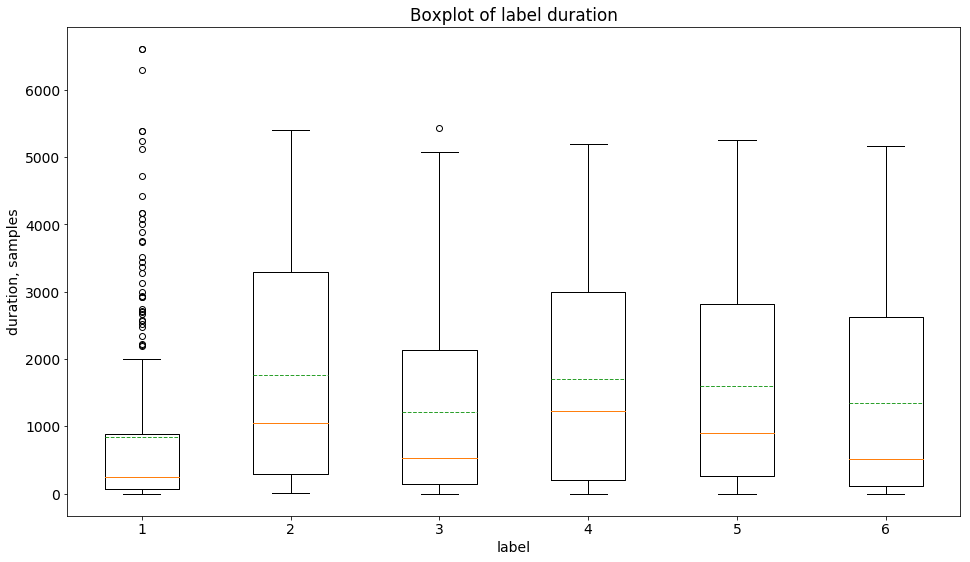

In [293]:
fig, ax = plt.subplots(figsize=(16,9))
plt.rcParams.update({'font.size': 14})

bplot1 = plt.boxplot(time_label.values(), notch = False, showmeans = True, meanline = True)

ax.set_title('Boxplot of label duration')
plt.xlabel('label')
plt.ylabel('duration, samples')

plt.show()

### visualize random file

In [280]:
file = 'id9adb2934.csv'

label_pd = pd.read_csv(pathlabels + file, skiprows=[0], header = None)
audio_pd = pd.read_csv(pathaudio + file, skiprows=[0], header = None)
eyes_pd = pd.read_csv(patheyes + file, skiprows=[0], header = None)
face_pd = pd.read_csv(pathface + file, skiprows=[0], header = None)
kinect_pd = pd.read_csv(pathkinect + file, skiprows=[0], header = None)

In [281]:
label_pd.head()

,0,1,2,3,4,5,6,7
0,0.57,0.0,0.0,0.0,0.0,0.0,1.0,0.333333
1,0.58,0.0,0.0,0.0,0.0,0.0,1.0,0.333333
2,0.59,0.0,0.0,0.0,0.0,0.0,1.0,0.333333
3,0.60,0.0,0.0,0.0,0.0,0.0,1.0,0.333333
4,0.61,0.0,0.0,0.0,0.0,0.0,1.0,0.333333


In [282]:
audio_pd.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [283]:
eyes_pd.head()

,0,1,2,3,4,5,6
0,0.575,1.0,1.0,0.339623,0.793651,-0.754717,0.793651
1,0.595,1.0,0.0,0.339623,0.761905,-0.735849,0.777778
2,0.615,1.0,1.0,0.339623,0.777778,-0.754717,0.777778
3,0.635,1.0,0.0,0.339623,0.777778,-0.735849,0.793651
4,0.655,1.0,1.0,0.358491,0.777778,-0.735849,0.777778


In [284]:
face_pd.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.575,2.017378,-1.373910,-0.539890,-0.621059,-0.142128,-0.231336,-0.082343,0.408322,-0.516501,...,-0.026414,-0.010442,0.015984,-0.054081,-0.016026,0.006695,0.039498,-0.017929,0.003560,0.013408
1,0.595,1.970807,-1.314278,-0.478643,-0.670106,-0.155659,-0.208240,-0.101388,0.400335,-0.475704,...,-0.024746,-0.018356,0.015191,-0.043945,-0.010228,0.004018,0.028613,-0.020442,0.005510,0.014556
2,0.615,2.007356,-1.370626,-0.585728,-0.511299,-0.070742,-0.246821,-0.102743,0.364910,-0.536358,...,-0.021357,-0.006344,0.016127,-0.055208,-0.017785,0.006560,0.038346,-0.022369,0.000864,0.017005
3,0.635,1.997505,-1.347256,-0.490852,-0.546349,-0.217139,-0.207067,-0.127087,0.368924,-0.530842,...,-0.021151,-0.017909,0.008460,-0.047392,-0.015371,0.009976,0.030870,-0.013326,0.001058,0.020965
4,0.655,1.929011,-1.316319,-0.593525,-0.531722,-0.016296,-0.291972,-0.092348,0.330051,-0.593870,...,-0.021665,-0.002977,0.019431,-0.055163,-0.015818,0.003752,0.038572,-0.024843,-0.001156,0.016125


In [285]:
kinect_pd.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.600000,0.440589,0.309020,0.238873,0.516045,0.313666,0.265941,0.216327,-0.748036,-1.212804,...,1.082485,2.087738,0.964179,-1.191387,0.876833,-0.101119,1.341519,1.475004,1.174978,0.154383
1,0.666667,0.436605,0.308503,0.236991,0.515965,0.313425,0.265974,0.216401,-0.751085,-1.239129,...,1.009566,2.144270,0.796140,-1.050621,0.987219,-0.089199,1.267939,1.295795,1.286354,0.153037
2,0.733333,0.428953,0.302121,0.241157,0.515933,0.313400,0.265958,0.216503,-0.840903,-1.121280,...,0.867971,2.172690,0.463759,-0.806306,1.040628,-0.071405,1.124427,0.904849,1.339855,0.149791
3,0.800000,0.433415,0.300925,0.246585,0.515897,0.313408,0.265895,0.216591,-0.859375,-1.102974,...,0.497488,2.184662,0.880360,-0.195873,1.054279,-0.072233,0.744416,1.381427,1.352719,0.149839
4,0.866667,0.436565,0.300829,0.251251,0.515782,0.313375,0.265453,0.216554,-0.879632,-1.191220,...,0.613361,2.236179,0.976022,-0.488839,1.022215,-0.094700,0.871239,1.488442,1.320409,0.150503


### Separable statistics

In [133]:
def plotter(numpy_data):
    audio_file = ''
    
    percent = 0
    flag = sum(numpy_data[0, 1:])
    inc = 0
    for d in numpy_data:

        if flag == 1:
            if sum(d[1:]) != 0 :
                inc += 1
            else:
                percent += inc
                audio_file += '1' * round(inc * (100 / len(numpy_data)))
                inc = 1
                flag = 0

        else:
            if sum(d[1:]) == 0 :
                inc += 1
            else:
                audio_file += '0' * round(inc * (100 / len(numpy_data)))
                inc = 1
                flag = 1

    if flag == 1:
        percent += inc
        audio_file += '1' * round(inc * (100 / len(numpy_data)))
    else:
        audio_file += '0' * round(inc * (100 / len(numpy_data)))

    if len(audio_file) < 100:
        audio_file += audio_file[-1] * (100 - len(audio_file))
    elif len(audio_file) > 100:
        audio_file = audio_file[:100]
    
    return audio_file, percent / len(numpy_data)

In [42]:
def statistic_dicts(label, modal, strt, shp, step, precision = 3):
    
    """
    Архивная функция.
    Нужна была для сбора статистики по подсчету ошибок в файлах модальностей.
    """
    
    set_precision = '{:.' + str(precision) + 'f}'
    try:
        strt[set_precision.format(modal[0, 0] - label[0, 0])] += 1
    except:
        strt[set_precision.format(modal[0, 0] - label[0, 0])] = 1

    try:
        shp[set_precision.format(len(label) / len(modal))] += 1
    except:
        shp[set_precision.format(len(label) / len(modal))] = 1        

    try:
        step[set_precision.format(modal[1, 0] - modal[0, 0])] += 1 
    except:
        step[set_precision.format(modal[1, 0] - modal[0, 0])] = 1

In [26]:
def load_lbl(lbl, path, file, shape):
    if lbl == 1:
        datas = np.array(pd.read_csv(path + file, skiprows=[0], header = None))[:, 0:]
    else:
        datas = np.zeros(shape)
        
    return datas

In [127]:
def data_vizualization(file, dict1, dict2, dict3, audio, eyes, face, kinect):
    
    label_data = np.array(pd.read_csv(pathlabels + file, skiprows=[0], header = None))[:, 0:]
    
    audio_data = load_lbl(audio, pathaudio, file, (len(label_data), 36))
    eyes_data = load_lbl(eyes, patheyes, file, (int(len(label_data) / 2), 6))
    face_data = load_lbl(face, pathface, file, (int(len(label_data) / 2), 100))
    kinect_data = load_lbl(kinect, pathkinect, file, (int(len(label_data) / 6.667), 27)) # 0.07
    
    

    if kinect == 1:
        statistic_dicts(label_data, kinect_data, dict1, dict2, dict3, precision = 2)
        
        
        for i in range(len(eyes_data) - 1):
            
            destrib = eyes_data[i + 1, 0] - eyes_data[i, 0]
            if destrib > 0.05:
                #print(file, eyes_data[i + 1, 0], destrib)
                pass
        
        #if '{:.2f}'.format(face_data[0, 0] - label_data[0, 0]) == '0.76':
        #    print(file)
    #if len(label_data) / len(eyes_data) < 3.95 and len(label_data) / len(eyes_data) > 2.05:
        #print(file , len(label_data) / len(eyes_data))
       
    #print('\n Начальные времена:', label_data[0:10, 0], audio_data[0:10, 0], eyes_data[0:10, 0], face_data[0:10, 0], kinect_data[0:10, 0])
    #print('\n Конечные времена:', label_data[-1][0], audio_data[-1][0], eyes_data[-1][0], face_data[-1][0], kinect_data[-1][0])
    #print(label_data.shape, audio_data.shape, eyes_data.shape, face_data.shape, kinect_data.shape)    
    #print('{} - audio  ({:.3f}%)\n{} - eyes   ({:.3f}%)\n{} - face   ({:.3f}%)\n{} - kinect ({:.3f}%)\n{} - labels ({:.3f}%)'
    #      .format(plotter(audio_data)[0], plotter(audio_data)[1],
    #              plotter(eyes_data)[0], plotter(eyes_data)[1],
    #              plotter(face_data)[0], plotter(face_data)[1],
    #              plotter(kinect_data)[0], plotter(kinect_data)[1],
    #              plotter(label_data)[0], plotter(label_data)[1]))
    
    
    #return start_counter, shape_counter, step_counter

In [128]:
start_counter = {}
shape_counter = {}
step_counter = {}
    
for key, value in dict_of_labels.items():
    #print('\n', key, value)
    data_vizualization(key, start_counter, shape_counter, step_counter, **value)

In [129]:
sorted_satrt = sorted(start_counter.items(), key=lambda kv: kv[0], reverse=True)
print(sorted_satrt)

[('0.06', 40), ('0.05', 47), ('0.04', 44), ('0.03', 42), ('0.02', 34), ('0.01', 28), ('0.00', 60)]


In [130]:
sorted_shape = sorted(shape_counter.items(), key=lambda kv: kv[0], reverse=True)

print(sorted_shape)

[('6.70', 2), ('6.69', 1), ('6.68', 36), ('6.67', 191), ('6.66', 59), ('6.65', 6)]


In [131]:
sorted_shape

[('6.70', 2),
 ('6.69', 1),
 ('6.68', 36),
 ('6.67', 191),
 ('6.66', 59),
 ('6.65', 6)]

In [132]:
step_counter

{'0.07': 295}